# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# OBSERVATIONS
----

* The temperature is highest just above the equator around 20 to 40 degrees latitude.  This temperature being higher in this area instead of the equator could be due to the earth being tilted 23.5 degrees from plane of orbit.
* There's more cloud coverage where temperatures are higher.
* Wind speed is slightly higher where there's more cloud cover.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
units = "imperial"

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
name = []
lng = []
lat = []
maxtemp = []
humid = []
cloud = []
windspd = []
country = []
datetime = []

city_number = 0
set_num = 1

for city in cities:
    q_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"
    weather_resp = requests.get(q_url).json()

    try:
        city_number += 1
        
        name.append(weather_resp['name'])
        lng.append(weather_resp['coord']['lon'])
        lat.append(weather_resp['coord']['lat'])
        maxtemp.append(weather_resp['main']['temp_max'])
        humid.append(weather_resp['main']['humidity'])
        cloud.append(weather_resp['clouds']['all'])
        windspd.append(weather_resp['wind']['speed'])
        country.append(weather_resp['sys']['country'])
        datetime.append(weather_resp['dt'])
        

        print(f"Processing Record {city_number} of Set {set_num} | {city}")


    except (KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    if city_number == 50:
        set_num += 1
        city_number = 0

Processing Record 1 of Set 1 | novosheshminsk
Processing Record 2 of Set 1 | villarrica
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | faya
Processing Record 8 of Set 1 | rikitea
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | charleville-mezieres
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | hobart
City not found. Skipping...
Processing Record 23 of Set 1 | aleksandrovsk
Processing Record 24 of Set 1 | tiksi
Processing Record 25 of Set 1 | busselton

Processing Record 6 of Set 5 | monte azul
Processing Record 7 of Set 5 | jasper
Processing Record 8 of Set 5 | namtsy
Processing Record 9 of Set 5 | dawson
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | umm lajj
Processing Record 12 of Set 5 | hofn
Processing Record 13 of Set 5 | zhezkazgan
Processing Record 14 of Set 5 | lazaro cardenas
Processing Record 15 of Set 5 | hirara
Processing Record 16 of Set 5 | geraldton
Processing Record 17 of Set 5 | ibra
Processing Record 18 of Set 5 | plettenberg bay
Processing Record 19 of Set 5 | roma
Processing Record 20 of Set 5 | kangalassy
Processing Record 21 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 5 | daru
Processing Record 23 of Set 5 | fortuna
Processing Record 24 of Set 5 | bloemhof
Processing Record 25 of Set 5 | nanortalik
Processing Record 26 of Set 5 | pedasi
Processing Record 27 of Set 5 | serebryanyy bor
Processing Record 28 of Set 5 | carnarvon
Processing Record 29 of Set 5 | tairua
Pro

Processing Record 8 of Set 9 | cantaura
Processing Record 9 of Set 9 | cascais
Processing Record 10 of Set 9 | fenelon falls
Processing Record 11 of Set 9 | vardo
Processing Record 12 of Set 9 | storforshei
Processing Record 13 of Set 9 | mezhova
Processing Record 14 of Set 9 | bereda
Processing Record 15 of Set 9 | olafsvik
Processing Record 16 of Set 9 | walvis bay
Processing Record 17 of Set 9 | bikaner
Processing Record 18 of Set 9 | komsomolskiy
Processing Record 19 of Set 9 | bustamante
Processing Record 20 of Set 9 | jumla
Processing Record 21 of Set 9 | rocha
Processing Record 22 of Set 9 | vestmannaeyjar
Processing Record 23 of Set 9 | alice springs
Processing Record 24 of Set 9 | celestun
Processing Record 25 of Set 9 | chumikan
Processing Record 26 of Set 9 | na klang
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 9 | serra
Processing Record 30 of Set 9 | shaowu
Processing Record 31 of Set 9 | cukai
Processing Record 32 of Set 9 | abatsko

In [4]:
city_summary = pd.DataFrame({"City Name": name,
                            "Longitude": lng,
                            "Latitude": lat,
                            "Max Temperature": maxtemp,
                            "Humidity": humid,
                            "Cloud Coverage": cloud,
                            "Wind Speed": windspd,
                            "City Country": country,
                            "Date Time": datetime})
city_summary.head()

,City Name,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,Date Time
0,Novosheshminsk,51.23,55.07,65.34,94,99,6.80,RU,1594413928
1,Villarrica,-56.43,-25.75,65.71,84,0,6.15,PY,1594413928
2,Ushuaia,-68.30,-54.80,33.80,74,40,5.82,AR,1594413890
3,Ponta do Sol,-17.10,32.67,72.00,72,3,6.51,PT,1594413929
4,Punta Arenas,-70.92,-53.15,33.80,86,75,9.17,CL,1594413843


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Export csv
city_sum_output = city_summary.to_csv("../output_data/cities.csv", index=False)

In [6]:
city_sum_path = "../output_data/cities.csv"
city_sum_csv = pd.read_csv(city_sum_path)
city_sum_csv

,City Name,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,Date Time
0,Novosheshminsk,51.23,55.07,65.34,94,99,6.80,RU,1594413928
1,Villarrica,-56.43,-25.75,65.71,84,0,6.15,PY,1594413928
2,Ushuaia,-68.30,-54.80,33.80,74,40,5.82,AR,1594413890
3,Ponta do Sol,-17.10,32.67,72.00,72,3,6.51,PT,1594413929
4,Punta Arenas,-70.92,-53.15,33.80,86,75,9.17,CL,1594413843
...,...,...,...,...,...,...,...,...,...
538,Mehrān,46.16,33.12,96.93,11,0,10.00,IR,1594414049
539,Carballo,-8.69,43.21,64.40,72,40,8.05,ES,1594413793
540,Kindu,25.95,-2.95,78.19,51,31,0.98,CD,1594414049
541,Ilulissat,-51.10,69.22,42.80,87,100,12.75,GL,1594414019


 this step if there are no cities that have humidity > 100%. 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_sum_csv.describe()

,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,Date Time
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.357459,18.569466,68.811215,71.858195,52.637201,8.220700,1.594414e+09
std,92.048029,33.987821,14.679368,20.328396,38.958383,5.397834,9.659457e+01
min,-175.200000,-54.800000,32.000000,3.000000,0.000000,0.470000,1.594414e+09
25%,-60.380000,-9.840000,57.200000,62.500000,12.000000,4.050000,1.594414e+09
50%,25.610000,21.320000,69.800000,76.000000,58.000000,6.930000,1.594414e+09
75%,102.275000,47.745000,80.175000,86.000000,90.000000,11.410000,1.594414e+09
max,179.320000,78.220000,107.600000,100.000000,100.000000,26.350000,1.594414e+09


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

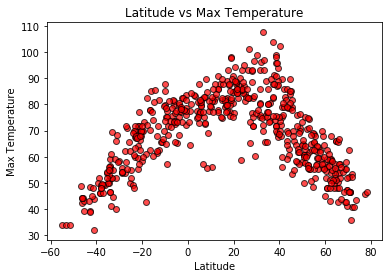

In [10]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Max Temperature"], marker="o", facecolors="red", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Max Temperature")
plt.savefig("../output_data/Fig1.png")
plt.show()

* The max temperature is higher the closer it is to the equator (0).  The further away from 0 degrees, the colder the temperature.

## Latitude vs. Humidity Plot

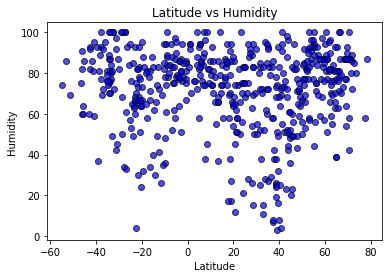

In [11]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.savefig("../output_data/Fig2.png")
plt.show()

* Humidity runs mostly from 60% to 100% throughout full range of latitude except with more variations at -20 degrees and between 20 - 40 degrees latitude

## Latitude vs. Cloudiness Plot

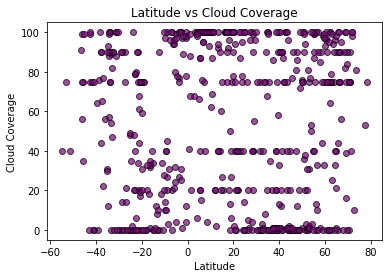

In [12]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Cloud Coverage"], marker="o", facecolors="purple", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Latitude vs Cloud Coverage")
plt.savefig("../output_data/Fig3.png")
plt.show()

* The equator (0) has a lot of cloud cover while other latitude positions have a mix of a lot of cloud coverage and no cloud coverage.

## Latitude vs. Wind Speed Plot

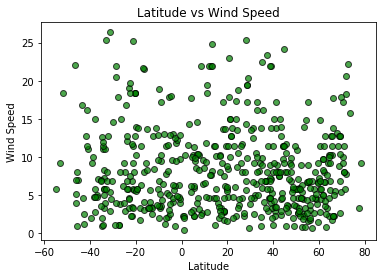

In [13]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Wind Speed"], marker="o", facecolors="green", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.savefig("../output_data/Fig4.png")
plt.show()

* Majority of windspeed from -40 to 70 runs from 0 to 15 degrees

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

*Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_sum_csv.loc[city_sum_csv['Latitude']>=0]
northern

,City Name,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,Date Time
0,Novosheshminsk,51.23,55.07,65.34,94,99,6.80,RU,1594413928
3,Ponta do Sol,-17.10,32.67,72.00,72,3,6.51,PT,1594413929
6,Faya,42.45,18.39,77.00,38,13,2.82,SA,1594413929
8,Provideniya,-173.30,64.38,57.34,63,96,4.68,RU,1594413930
9,Khatanga,102.50,71.97,53.24,86,98,20.69,RU,1594413699
...,...,...,...,...,...,...,...,...,...
537,Kyaikto,97.02,17.30,79.63,85,100,2.42,MM,1594414048
538,Mehrān,46.16,33.12,96.93,11,0,10.00,IR,1594414049
539,Carballo,-8.69,43.21,64.40,72,40,8.05,ES,1594413793
541,Ilulissat,-51.10,69.22,42.80,87,100,12.75,GL,1594414019


In [16]:
southern = city_sum_csv.loc[city_sum_csv['Latitude']<0]
southern

,City Name,Longitude,Latitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,Date Time
1,Villarrica,-56.43,-25.75,65.71,84,0,6.15,PY,1594413928
2,Ushuaia,-68.30,-54.80,33.80,74,40,5.82,AR,1594413890
4,Punta Arenas,-70.92,-53.15,33.80,86,75,9.17,CL,1594413843
5,Hermanus,19.23,-34.42,51.01,75,88,11.01,ZA,1594413673
7,Rikitea,-134.97,-23.12,67.51,66,79,19.06,PF,1594413929
...,...,...,...,...,...,...,...,...,...
521,Cururupu,-44.87,-1.83,77.88,85,98,4.85,BR,1594414044
524,Lüderitz,15.16,-26.65,55.40,93,0,14.99,NaN,1594414045
526,Luganville,167.17,-15.53,77.00,88,40,9.17,VU,1594414045
536,Itarema,-39.92,-2.92,78.94,81,25,12.55,BR,1594414011


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5126140013170803


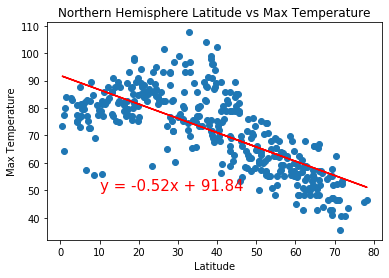

In [17]:
n_lat = northern["Latitude"]
n_mtemp = northern["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_mtemp)
n_lat_temp_regress = n_lat * slope + intercept
n_lat_temp_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_mtemp)
plt.plot(n_lat, n_lat_temp_regress, "r-")
plt.annotate(n_lat_temp_line,(10, 50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere Latitude vs Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7400813452427862


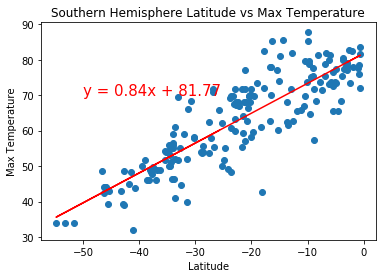

In [18]:
s_lat = southern["Latitude"]
s_mtemp = southern["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_mtemp)
s_lat_temp_regress = s_lat * slope + intercept
s_lat_temp_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_mtemp)
plt.plot(s_lat, s_lat_temp_regress, "r-")
plt.annotate(s_lat_temp_line,(-50, 70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere Latitude vs Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Northern Southern Hemisphere - Max Temp and Latitude
The higher the latitude is in the Northern hemisphere, the lower the temperature is, except around 20 - 40 degrees, as it's approaching the North Pole/Arctic Circle.  The temperature rises int he Southern hemisphere as it moves away from the South Pole/Antartica.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003196516591298839


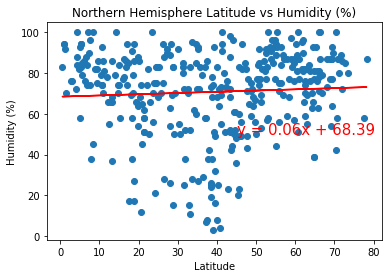

In [19]:
n_hum = northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
n_lat_hum_regress = n_lat * slope + intercept
n_lat_hum_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_hum)
plt.plot(n_lat, n_lat_hum_regress, "r-")
plt.annotate(n_lat_hum_line,(45, 50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Latitude vs Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is: 0.0041786539168524985


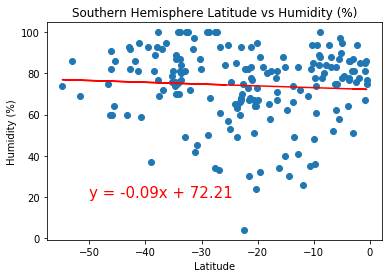

In [20]:
s_hum = southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum)
s_lat_hum_regress = s_lat * slope + intercept
s_lat_hum_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_hum)
plt.plot(s_lat, s_lat_hum_regress, "r-")
plt.annotate(s_lat_hum_line,(-50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Latitude vs Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Northern Southern Latitude and Humidity
Humidity slightly decreases as it reaches 0 degrees.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003719588692636017


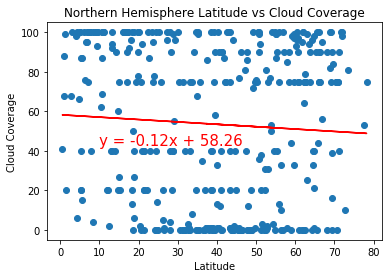

In [21]:
n_cld = northern["Cloud Coverage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cld)
n_lat_cld_regress = n_lat * slope + intercept
n_lat_cld_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_cld)
plt.plot(n_lat, n_lat_cld_regress, "r-")
plt.annotate(n_lat_cld_line,(10, 43), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Northern Hemisphere Latitude vs Cloud Coverage")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009594187749171494


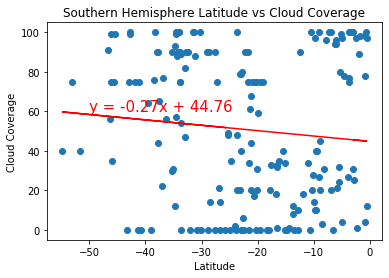

In [22]:
s_cld = southern["Cloud Coverage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cld)
s_lat_cld_regress = s_lat * slope + intercept
s_lat_cld_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_cld)
plt.plot(s_lat, s_lat_cld_regress, "r-")
plt.annotate(s_lat_cld_line,(-50, 60), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Southern Hemisphere Latitude vs Cloud Coverage")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## North South Lat and Cloudiness
Cloud coverage lessens as we move up in latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005305767654000983


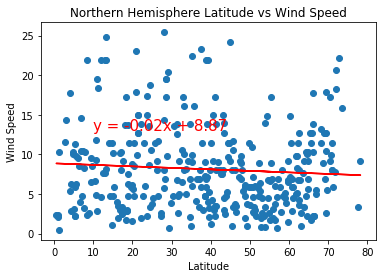

In [23]:
n_wind = northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
n_lat_wind_regress = n_lat * slope + intercept
n_lat_wind_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat, n_wind)
plt.plot(n_lat, n_lat_wind_regress, "r-")
plt.annotate(n_lat_wind_line,(10, 13), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Latitude vs Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0013787058917036543


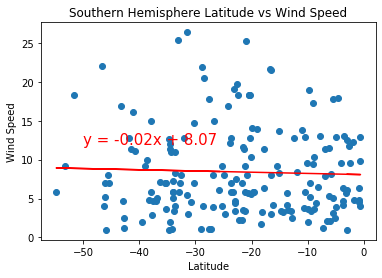

In [24]:
s_wind = southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)
s_lat_wind_regress = s_lat * slope + intercept
s_lat_wind_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat, s_wind)
plt.plot(s_lat, s_lat_wind_regress, "r-")
plt.annotate(s_lat_wind_line,(-50, 12), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude vs Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## North South Lat and Wind Speed
Wind speed decreases as latitude increases.